<br>
<br>


**Problem Breaks down into five simple steps to solve a problem in monte carlo method:**
- Setting up a probability distribution for important variables.
- Building a cumulative probability distributino for each variable.
- Establishing an interval of random numbers for each variable.
- Generating random numbers.
- Actually simulating a serics of trials.


<br>
<br>

In [112]:

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


<br>
<br>

# `#2.2: Coin Toss Gambling Game:`

<br>
<br>

In [113]:

# coin toss:
def coin_toss()->int:
    return np.random.randint(0,2)

def gambling_game(no_of_game:int)->tuple[pd.DataFrame,tuple[int,int]]:
    records = []
    win_count = 0
    lose_count = 0
    for i in range(1,no_of_game+1):
        flips = 0
        head_count = 0
        tail_count = 0
        while(abs(head_count-tail_count))<3:
            flips+=1
            if coin_toss()==0:
                head_count+=1
            else:
                tail_count+=1
        if flips<8:
            win_count+=1
        else: 
            lose_count+=1
        records.append({"Game_no":i,"Head_Count":head_count,"Tail_Count":tail_count,"Result":flips<8})
            
    return pd.DataFrame(records),(win_count,lose_count)

data_frame,count = gambling_game(50)
print("Win,Loss ",count)
data_frame

Win,Loss  (31, 19)


,Game_no,Head_Count,Tail_Count,Result
0,1,0,3,True
1,2,6,9,False
2,3,5,2,True
3,4,0,3,True
4,5,0,3,True
5,6,5,8,False
6,7,3,0,True
7,8,1,4,True
8,9,5,2,True
9,10,3,0,True


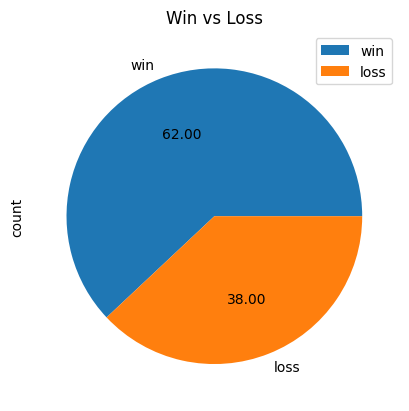

In [114]:


plt.title(f"Win vs Loss")
data_frame["Result"].astype(int).value_counts().rename({0:"loss",1:"win"}).plot(kind="pie",autopct="%.2f")
plt.legend()
plt.show()



<br>
<br>

# `#2.4: Value of pi:`

<br>

```txt
Area of circle = pi*r^2
Area of sqaure = 2r*2r = 4 r*2 

pi*r^2/4r^2 = pi/4 = inside_circle/total 

pi = 4 *(inside_cricle/4)
```

<br>

In [115]:
np.random.random(size=5)

array([0.11929043, 0.51928563, 0.58672088, 0.02902686, 0.4967816 ])

In [136]:

def value_of_pi(n:int):
    x = np.random.random(size=n)
    y = np.random.random(size=n)
    inside_cnt = 0
    val = []
    for i in range(n):
        if (x[i]**2+y[i]**2)<1:
            inside_cnt +=1 
        value = 4*(inside_cnt/(i+1))
        val.append(value)
    return value,val

value, val = value_of_pi(100000)
value

3.14576

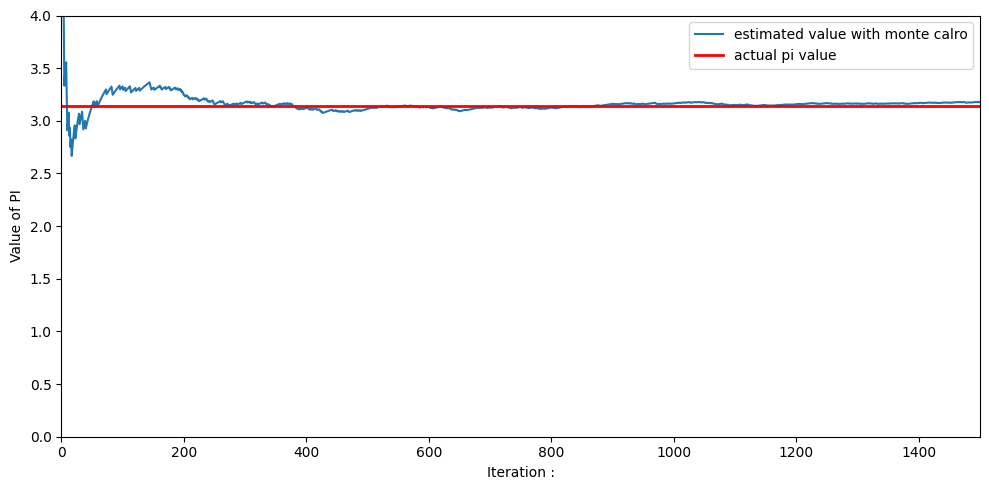

In [137]:

plt.figure(figsize=(10,5))
plt.plot(val,label="estimated value with monte calro")
plt.axhline(y=np.pi,color="red",label="actual pi value",linewidth=2)
plt.xlabel("Iteration :")
plt.ylabel("Value of PI")
plt.ylim(0,4)
plt.xlim(0,1500)
plt.legend()
plt.tight_layout()
plt.show()


<br>
<br>

# `#2.3: Numerical Intregation:`

```txt
- যেকোনো, x_i তে curve-এর height = xi_3
- তার নিচে থাকা সব y value হলো valid area
```
<br>
<br>

In [118]:


# true value: 152.25
def make_eq(x):
    return x**3 


def numerical_intregation(n:int,upper_limit:int,lower_limit:int)->tuple[list,int]:
    val = []
    rec_height = make_eq(upper_limit)
    x  = np.linspace(lower_limit,upper_limit,n)
    y = np.random.random(n)*rec_height
    x_3 = x**3 
    shed_val = 0
    for i in range(n):
        if y[i]<x_3[i]:
            shed_val+=1
        area = (shed_val/(i+1)) * rec_height * (upper_limit-lower_limit)
        val.append(area)
    return area,val

area , val = numerical_intregation(10000,5,2)
print(area)


152.02499999999998


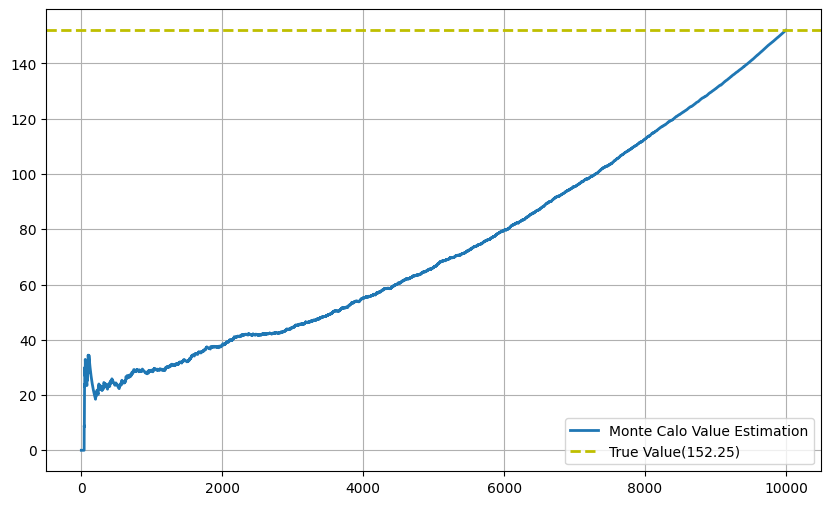

In [119]:

plt.figure(figsize=(10,6))
plt.plot(val,label="Monte Calo Value Estimation",linewidth=2)
plt.axhline(y=152.25,linestyle="--",color="y",label="True Value(152.25)",linewidth=2)
plt.grid()
plt.legend()
plt.show()


<br>
<br>


# `#2.5: A random walk`

<br>
<br>

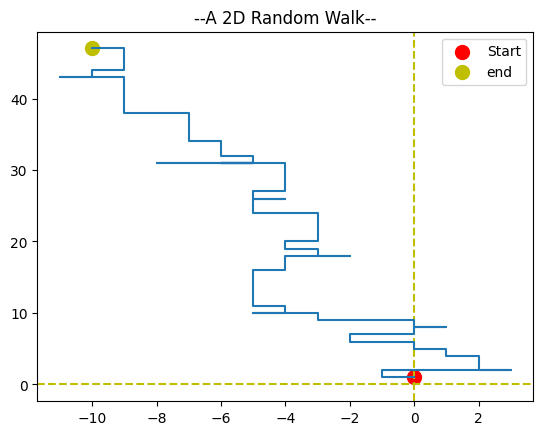

In [120]:


def a_random_walk(total_step:int):
    expt = []
    x = y = 0 
    for _ in range(total_step):
        r_num = np.random.randint(0,11)
        if r_num in [0,1,2,3,4]:
            y +=1 
        elif r_num in [5,6,7]:
            x -=1 
        elif r_num in [8,9]:
            x +=1 
        expt.append([x,y])
    return np.matrix(expt)
ans = a_random_walk(100)


plt.title("--A 2D Random Walk--")
plt.axhline(y=0,linestyle="--",color="y")
plt.axvline(x=0,linestyle="--",color="y")
plt.plot(ans[:,0],ans[:,1])
plt.scatter(ans[0:1,0:1].item(),y=ans[0:1,1:2].item(),s=100,label="Start",c="red")
plt.scatter(ans[-1,0:1].item(),y=ans[-1,1:2].item(),s=100,label="end",c="y")
plt.legend()
plt.show()
